<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic8/Chollet_HFST8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

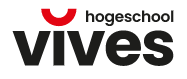<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# 8. Introduction to deep learning for computer vision

Hoofdstuk 8 uit het boek "Deep Learning with Python" (2e editie) van François Chollet

## 8.1. Introduction to convnets

### 8.1.0. MNIST example

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [5]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 16s 5ms/step - loss: 0.1586 - accuracy: 0.9515
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0317 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9941


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9926
Test accuracy: 0.993


### 8.1.1. The convolution operation

Voorbeeld komt uit: https://medium.com/apache-mxnet/multi-channel-convolutions-explained-with-ms-excel-9bbf8eb77108

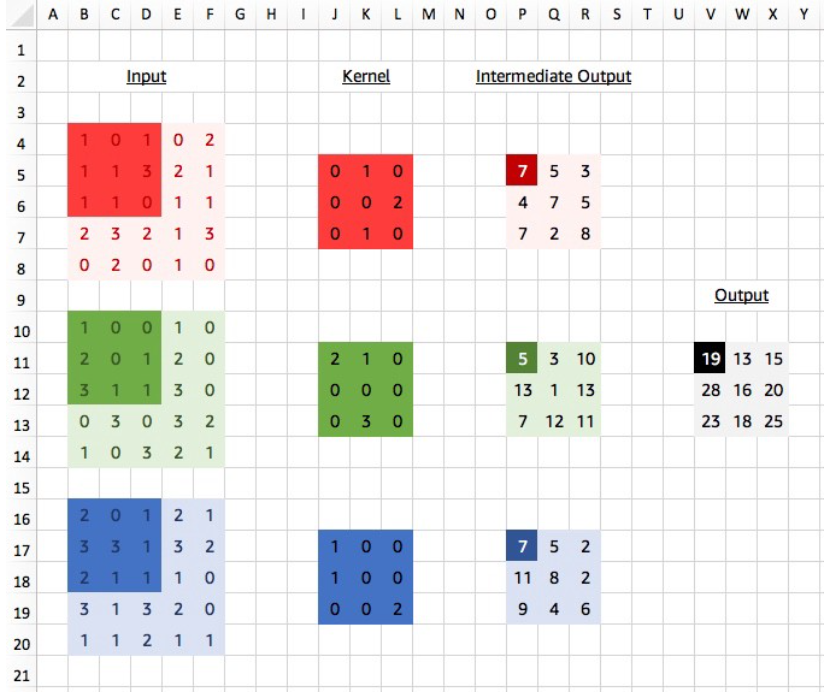

In [7]:
import numpy as np

In [8]:
Input = [[[1, 0, 1, 0, 2],
          [1, 1, 3, 2, 1],
          [1, 1, 0, 1, 1],
          [2, 3, 2, 1, 3],
          [0, 2, 0, 1, 0]],
         [[1, 0, 0, 1, 0],
          [2, 0, 1, 2, 0],
          [3, 1, 1, 3, 0],
          [0, 3, 0, 3, 2],
          [1, 0, 3, 2, 1]],
         [[2, 0, 1, 2, 1],
          [3, 3, 1, 3, 2],
          [2, 1, 1, 1, 0],
          [3, 1, 3, 2, 0],
          [1, 1, 2, 1, 1]]]
Input = np.asarray(Input)
Input

array([[[1, 0, 1, 0, 2],
        [1, 1, 3, 2, 1],
        [1, 1, 0, 1, 1],
        [2, 3, 2, 1, 3],
        [0, 2, 0, 1, 0]],

       [[1, 0, 0, 1, 0],
        [2, 0, 1, 2, 0],
        [3, 1, 1, 3, 0],
        [0, 3, 0, 3, 2],
        [1, 0, 3, 2, 1]],

       [[2, 0, 1, 2, 1],
        [3, 3, 1, 3, 2],
        [2, 1, 1, 1, 0],
        [3, 1, 3, 2, 0],
        [1, 1, 2, 1, 1]]])

In [9]:
Kernel = [[[0, 1, 0],
           [0, 0, 2],
           [0, 1, 0]],
          [[2, 1, 0],
           [0, 0, 0],
           [0, 3, 0]],
          [[1, 0, 0],
           [1, 0, 0],
           [0, 0, 2]]]
Kernel = np.asarray(Kernel)
Kernel

array([[[0, 1, 0],
        [0, 0, 2],
        [0, 1, 0]],

       [[2, 1, 0],
        [0, 0, 0],
        [0, 3, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [0, 0, 2]]])

**Oefening**: Pas convolutie toe. Schrijf generieke code. Gebruik dus variabelen!

In [10]:
kernel_size = Kernel.shape[-1]  # aantal rijen en kolommen in kernel (hier zijn dat er 3)
n = 1 + Input.shape[-1] - kernel_size  # aantal keren dat je de kernel opschuift langs een as (hier is dat 3)
Output = np.zeros((n, n), dtype=int)
for row in range(n):
    for col in range(n):
        Output[row, col] = (Input[:, row:row+kernel_size, col:col+kernel_size] * Kernel).sum()
Output

array([[19, 13, 15],
       [28, 16, 20],
       [23, 18, 25]])

**Oefening**: Pas dezelfde convolutie toe maar maak nu gebruik van zero padding zodat de output array dezelfde shape heeft als de input array.

In [11]:
# gebruik maken van functie concatenate() om de nullen toe te voegen
depth, nrow, ncol = Input.shape
zero_column = np.zeros((depth, nrow, 1))
zero_row = np.zeros((depth, 1, ncol + 2))
Padded = np.concatenate((zero_row,
                         np.concatenate((zero_column, Input, zero_column), axis=2),
                         zero_row), axis=1)
Padded

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 2., 0.],
        [0., 1., 1., 3., 2., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0.],
        [0., 2., 3., 2., 1., 3., 0.],
        [0., 0., 2., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0.],
        [0., 2., 0., 1., 2., 0., 0.],
        [0., 3., 1., 1., 3., 0., 0.],
        [0., 0., 3., 0., 3., 2., 0.],
        [0., 1., 0., 3., 2., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 1., 2., 1., 0.],
        [0., 3., 3., 1., 3., 2., 0.],
        [0., 2., 1., 1., 1., 0., 0.],
        [0., 3., 1., 3., 2., 0., 0.],
        [0., 1., 1., 2., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [12]:
# je kan ook de padded array initialiseren met nullen
# en dan het midden vervangen door de originele array
Padded = np.zeros((depth, nrow + 2, ncol + 2))
Padded[:, 1:-1, 1:-1] = Input
Padded

array([[[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 2., 0.],
        [0., 1., 1., 3., 2., 1., 0.],
        [0., 1., 1., 0., 1., 1., 0.],
        [0., 2., 3., 2., 1., 3., 0.],
        [0., 0., 2., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 1., 0., 0.],
        [0., 2., 0., 1., 2., 0., 0.],
        [0., 3., 1., 1., 3., 0., 0.],
        [0., 0., 3., 0., 3., 2., 0.],
        [0., 1., 0., 3., 2., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 1., 2., 1., 0.],
        [0., 3., 3., 1., 3., 2., 0.],
        [0., 2., 1., 1., 1., 0., 0.],
        [0., 3., 1., 3., 2., 0., 0.],
        [0., 1., 1., 2., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0.]]])

In [13]:
# tenslotte is er ook een functie pad() in NumPy
np.pad(Input, pad_width=1)[1:-1]

array([[[0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 2, 0],
        [0, 1, 1, 3, 2, 1, 0],
        [0, 1, 1, 0, 1, 1, 0],
        [0, 2, 3, 2, 1, 3, 0],
        [0, 0, 2, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0],
        [0, 2, 0, 1, 2, 0, 0],
        [0, 3, 1, 1, 3, 0, 0],
        [0, 0, 3, 0, 3, 2, 0],
        [0, 1, 0, 3, 2, 1, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 1, 2, 1, 0],
        [0, 3, 3, 1, 3, 2, 0],
        [0, 2, 1, 1, 1, 0, 0],
        [0, 3, 1, 3, 2, 0, 0],
        [0, 1, 1, 2, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0]]])

In [14]:
kernel_size = Kernel.shape[-1]  # aantal rijen en kolommen in kernel (hier zijn dat er 3)
n = 1 + Padded.shape[-1] - kernel_size  # aantal keren dat je de kernel opschuift langs een as (hier is dat 3)
Output = np.zeros((n, n), dtype=int)
for row in range(n):
    for col in range(n):
        Output[row, col] = (Padded[:, row:row+kernel_size, col:col+kernel_size] * Kernel).sum()
Output

array([[13,  7, 12, 17,  3],
       [16, 19, 13, 15, 10],
       [ 9, 28, 16, 20, 18],
       [15, 23, 18, 25, 13],
       [ 6, 10, 12,  9, 14]])

**Oefening**: Schrijf nu een generieke functie `convolution` die convolutie toepast op een gegeven tensor met een gegeven kernel. Stel inputparameter `stride` default gelijk aan `1` en inputparameter `padding` default aan `False`.

In [15]:
def convolution(tensor, kernel, stride=1, padding=False):
    depth, height, width = tensor.shape
    if padding:
        zero_column = np.zeros((depth, height, 1))
        zero_row = np.zeros((depth, 1, width + 2))
        tensor = np.concatenate((zero_row,
                                 np.concatenate((zero_column, tensor, zero_column), axis=2),
                                 zero_row), axis=1)
        height += 2
        width += 2
    kernel_size = kernel.shape[-1]
    row_indices = range(0, height - kernel_size + 1, stride)  # rijen waarop convolutie wordt toegepast
    col_indices = range(0, width - kernel_size + 1, stride)  # kolommen waarop convolutie wordt toegepast
    nrow = len(row_indices)  # aantal rijen in output tensor
    ncol = len(col_indices)  # aantal kolommen in output tensor
    output = np.zeros((nrow, ncol), dtype=float)
    for i, row in enumerate(row_indices):
            for j, col in enumerate(col_indices):
                output[i, j] = np.sum(tensor[:, row:row+kernel_size, col:col+kernel_size] * kernel)
    return output

In [16]:
convolution(tensor=Input, kernel=Kernel)

array([[19., 13., 15.],
       [28., 16., 20.],
       [23., 18., 25.]])

In [17]:
convolution(tensor=Input, kernel=Kernel, padding=True)

array([[13.,  7., 12., 17.,  3.],
       [16., 19., 13., 15., 10.],
       [ 9., 28., 16., 20., 18.],
       [15., 23., 18., 25., 13.],
       [ 6., 10., 12.,  9., 14.]])

In [18]:
convolution(tensor=Input, kernel=Kernel, stride=2)

array([[19., 15.],
       [23., 25.]])

### 8.1.2. The max-pooling operation

In [19]:
import numpy as np

In [20]:
Input = [[[1, 0, 1, 0, 2],
          [1, 1, 3, 2, 1],
          [1, 1, 0, 1, 1],
          [2, 3, 2, 1, 3],
          [0, 2, 0, 1, 0]],
         [[1, 0, 0, 1, 0],
          [2, 0, 1, 2, 0],
          [3, 1, 1, 3, 0],
          [0, 3, 0, 3, 2],
          [1, 0, 3, 2, 1]],
         [[2, 0, 1, 2, 1],
          [3, 3, 1, 3, 2],
          [2, 1, 1, 1, 0],
          [3, 1, 3, 2, 0],
          [1, 1, 2, 1, 1]]]
Input = np.asarray(Input)
Input

array([[[1, 0, 1, 0, 2],
        [1, 1, 3, 2, 1],
        [1, 1, 0, 1, 1],
        [2, 3, 2, 1, 3],
        [0, 2, 0, 1, 0]],

       [[1, 0, 0, 1, 0],
        [2, 0, 1, 2, 0],
        [3, 1, 1, 3, 0],
        [0, 3, 0, 3, 2],
        [1, 0, 3, 2, 1]],

       [[2, 0, 1, 2, 1],
        [3, 3, 1, 3, 2],
        [2, 1, 1, 1, 0],
        [3, 1, 3, 2, 0],
        [1, 1, 2, 1, 1]]])

**Oefening**: Pas max-pooling toe met een venster van 2 x 2. Schrijf generieke code. Gebruik dus variabelen!

In [21]:
pool_size = 2  # aantal rijen en kolommen in pooling venster
n = 1 + Input.shape[-1] - pool_size  # aantal keren dat je het venster opschuift langs een as (hier is dat 3)
depth = Input.shape[0]  # aantal channels
Output = np.zeros((depth, n, n), dtype=int)
for d in range(depth):
    for row in range(n):
        for col in range(n):
            Output[d, row, col] = Input[d, row:row+pool_size, col:col+pool_size].max()
Output

array([[[1, 3, 3, 2],
        [1, 3, 3, 2],
        [3, 3, 2, 3],
        [3, 3, 2, 3]],

       [[2, 1, 2, 2],
        [3, 1, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 3]],

       [[3, 3, 3, 3],
        [3, 3, 3, 3],
        [3, 3, 3, 2],
        [3, 3, 3, 2]]])

**Oefening**: Pas average-pooling toe met een venster van 3 x 3 en stride = 2. Schrijf generieke code. Gebruik dus variabelen!

In [22]:
pool_size = 3  # aantal rijen en kolommen in pooling venster
stride = 2
input_size = Input.shape[-1]  # width and height
depth = Input.shape[0]  # aantal channels
indices = range(0, input_size - pool_size + 1, stride)  # kolommen/rijen waarop pooling wordt toegepast
n = len(indices)  # output size
Output = np.zeros((depth, n, n), dtype=float)  # float want gemiddelde!!
for d in range(depth):
    for i in range(n):
        for j in range(n):
            row, col = indices[i], indices[j]
            Output[d, i, j] = Input[d, row:row+pool_size, col:col+pool_size].mean()
Output

array([[[1.        , 1.22222222],
        [1.22222222, 1.        ]],

       [[1.        , 0.88888889],
        [1.33333333, 1.66666667]],

       [[1.55555556, 1.33333333],
        [1.66666667, 1.22222222]]])

**Oefening**: Schrijf nu een generieke functie `pooling` die max of average pooling toepast op een gegeven tensor.

In [23]:
def pooling(tensor, function=np.max, pool_size=2, stride=2):
    depth, height, width = tensor.shape
    row_indices = range(0, height - pool_size + 1, stride)  # rijen waarop pooling wordt toegepast
    col_indices = range(0, width - pool_size + 1, stride)  # kolommen waarop pooling wordt toegepast
    nrow = len(row_indices)  # aantal rijen in output tensor
    ncol = len(col_indices)  # aantal kolommen in output tensor
    output = np.zeros((depth, nrow, ncol), dtype=float)
    for d in range(depth):
        for i in range(nrow):
            for j in range(ncol):
                row, col = row_indices[i], col_indices[j]
                output[d, i, j] = function(tensor[d, row:row+pool_size, col:col+pool_size])
    return output

In [24]:
pooling(tensor=Input, stride=1)

array([[[1., 3., 3., 2.],
        [1., 3., 3., 2.],
        [3., 3., 2., 3.],
        [3., 3., 2., 3.]],

       [[2., 1., 2., 2.],
        [3., 1., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 2.],
        [3., 3., 3., 2.]]])

In [25]:
pooling(tensor=Input, function=np.mean, pool_size=3, stride=2)

array([[[1.        , 1.22222222],
        [1.22222222, 1.        ]],

       [[1.        , 0.88888889],
        [1.33333333, 1.66666667]],

       [[1.55555556, 1.33333333],
        [1.66666667, 1.22222222]]])

## 8.2. Training a convnet from scratch on a small dataset

Kies voor GPU of TPU via menu
- "Runtime > Change runtime type"

of

- "Edit > Notebook settings > Hardware accelerator"

### 8.2.2. Downloading the data

kaggle.json file aanmaken via Kaggle website (zie uitleg boek p212 ev):
- inloggen
- ga naar "My Account" > API section


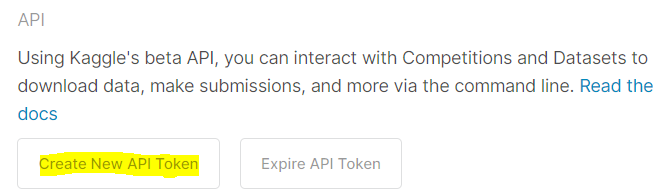

kaggle.json file uploaden in je Colab folder:

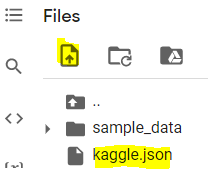

kaggle.json file in .kaggle folder plaatsen:

In [26]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

kaggle package upgraden:

In [27]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110683 sha256=8d44f6e88368294cf5f2fcffebb097ea1509e4d675356d316a947bf32985577a
  Stored in directory: /root/.cache/pip/wheels/43/4b/fb/736478af5e8004810081a06259f9aa2f7c3329fc5d03c2c412
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16


In [28]:
!kaggle -v

Kaggle API 1.5.16


dogs-vs-cats dataset downloaden:

(indien 403 foutmelding, voorwaarden accepteren via www.kaggle.com/c/dogs-vs-cats/rules)

In [29]:
!kaggle competitions download -c dogs-vs-cats

 99% 808M/812M [00:10<00:00, 122MB/s] 
100% 812M/812M [00:10<00:00, 80.2MB/s]


Indien dit niet lukt, dan kan je natuurlijk altijd de dataset manueel downloaden via https://www.kaggle.com/c/dogs-vs-cats/data.

Unzippen:

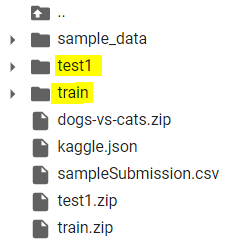

In [30]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip
!unzip -qq test1.zip

Dataset beperken (om het probleem realistischer te maken):

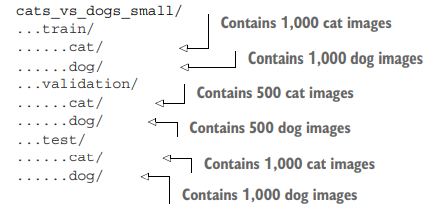

In [31]:
import os, shutil  # zie boek voor code die gebruik maakt van pathlib!

original_dir = "train"
new_base_dir = "cats_vs_dogs_small"

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        directory = os.path.join(new_base_dir, subset_name, category)
        os.makedirs(directory)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=os.path.join(original_dir, fname), dst=os.path.join(directory, fname))

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [32]:
# volledige directory (met inhoud) verwijderen:
#shutil.rmtree('cats_vs_dogs_small')

In [33]:
# checken
subsets = ('test', 'train', 'validation')
categories = ('cat', 'dog')
for subset in subsets:
    for category in categories:
        print(subset, category, ':', len(os.listdir(os.path.join(new_base_dir, subset, category))))

test cat : 1000
test dog : 1000
train cat : 1000
train dog : 1000
validation cat : 500
validation dog : 500


### 8.2.3. Building the model

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)  # RGB waarden tussen 0 en 255 herschalen naar waarden tussen 0 en 1
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**Oefening**: Leg het aantal parameters uit!

In [37]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
  )

### 8.2.4. Data preprocessing

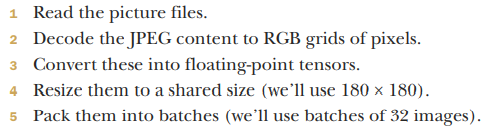

In [38]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    os.path.join(new_base_dir, "train"),
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    os.path.join(new_base_dir, "validation"),
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    os.path.join(new_base_dir, "test"),
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [39]:
print(type(train_dataset))
print(type(validation_dataset))
print(type(test_dataset))

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>


Shape van de data batches in trainingset checken:

In [40]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Intermezzo**: TensorFlow Dataset objects: zie boek p 218 ev.

In [41]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size=(1000, 16))  # random normaal verdeelde getallen
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.float64, name=None)>

In [42]:
# een Dataset object is een iterator
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2: break

(16,)
(16,)
(16,)


In [43]:
# de data batchen
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2: break

(32, 16)
(32, 16)
(32, 16)


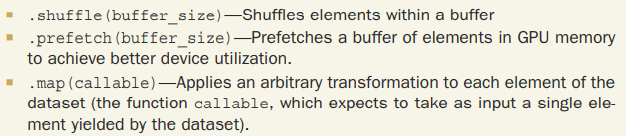

In [44]:
# map() toepassen om data te reshapen van (16, ) naar (4, 4)
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2: break

(4, 4)
(4, 4)
(4, 4)


### 8.2.5. Fitting and evaluating the model

Callback gebruiken om het model te saven na elke epoch:

In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch.h5",  # file waarin model wordt opgeslagen
    save_best_only=True,  # beste model wordt opgeslagen obv validation loss!
    monitor="val_loss")
]

Model trainen mbv de datasets:

(GPU gebruiken: menu Edit > Notebook settings > Hardware accelerator)

In [48]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 7s 104ms/step - loss: 0.6879 - accuracy: 0.5490 - val_loss: 0.6615 - val_accuracy: 0.6110


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
63/63 [==============================] - 6s 80ms/step - loss: 0.6594 - accuracy: 0.6085 - val_loss: 0.6175 - val_accuracy: 0.6400
Epoch 3/30
63/63 [==============================] - 4s 60ms/step - loss: 0.6322 - accuracy: 0.6680 - val_loss: 0.6240 - val_accuracy: 0.6380
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5837 - accuracy: 0.7045 - val_loss: 0.5773 - val_accuracy: 0.6930
Epoch 5/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5485 - accuracy: 0.7160 - val_loss: 0.5692 - val_accuracy: 0.6920
Epoch 6/30
63/63 [==============================] - 4s 60ms/step - loss: 0.5273 - accuracy: 0.7455 - val_loss: 0.5630 - val_accuracy: 0.7220
Epoch 7/30
63/63 [==============================] - 7s 110ms/step - loss: 0.4750 - accuracy: 0.7820 - val_loss: 0.5315 - val_accuracy: 0.7450
Epoch 8/30
63/63 [==============================] - 5s 71ms/step - loss: 0.4337 - accuracy: 0.8025 - val_loss: 0.7923 - val_accuracy: 0.6360
Epoch 9/30
6

File "convnet_from_scratch.h5" met opgeslagen model is hdf5-file:

In [49]:
import h5py
h5py.is_hdf5("convnet_from_scratch.h5")

True

Resultaat plotten:

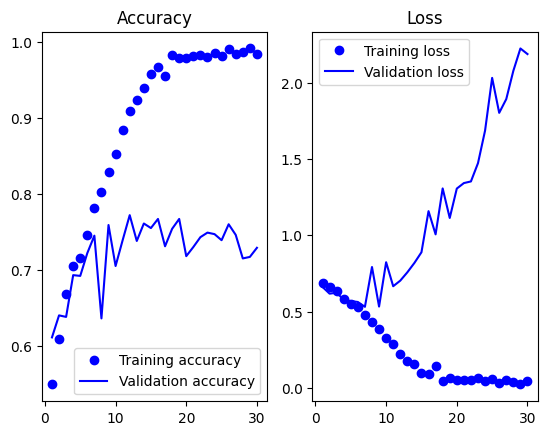

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # figure size vergroten

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epochs, accuracy, "bo", label="Training accuracy")
ax1.plot(epochs, val_accuracy, "b", label="Validation accuracy")
ax1.set_title("Accuracy")
ax1.legend();

ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Loss")
ax2.legend();

In [51]:
# opgeslagen model laden want we willen het beste model!
# zie ModelCheckpoint callback: save_best_only=True
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 69ms/step - loss: 0.5572 - accuracy: 0.7320
Test accuracy: 0.732


Conclusie: overfitting!

Oplossing: dataset "virtueel" uitbreiden = data augmentation

**Opdracht**: Maak gebruik van Keras callbacks om loss en accuracy tijdens training visueel weer te geven.

Tip: https://keras.io/guides/writing_your_own_callbacks/

### 8.2.6. Using data augmentation

Zie Keras documentatie: https://keras.io/guides/preprocessing_layers/

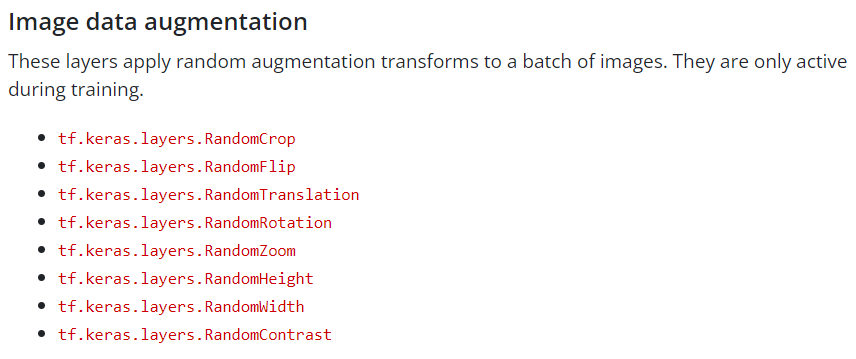

In [52]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

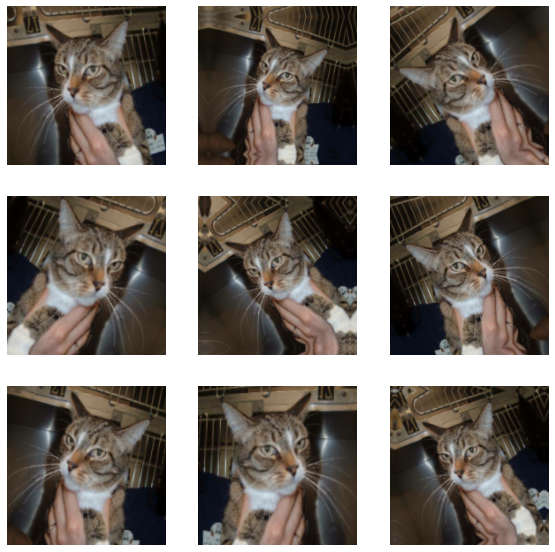

In [53]:
plt.rcParams['figure.dpi'] = 70  # figure size verkleinen
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [54]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)  # we voegen de data augmentation lagen toe aan ons model
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)  # we voegen een dropout laag toe
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [55]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

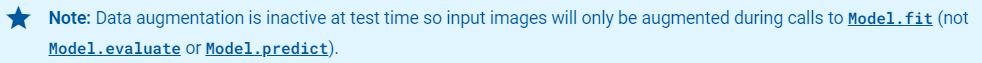

In [57]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="convnet_from_scratch_with_augmentation.h5",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 9s 129ms/step - loss: 0.6935 - accuracy: 0.5050 - val_loss: 0.6900 - val_accuracy: 0.5430
Epoch 2/100
63/63 [==============================] - 7s 106ms/step - loss: 0.6959 - accuracy: 0.5445 - val_loss: 0.6691 - val_accuracy: 0.6210
Epoch 3/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6732 - accuracy: 0.5835 - val_loss: 0.6807 - val_accuracy: 0.5620
Epoch 4/100
63/63 [==============================] - 5s 77ms/step - loss: 0.6657 - accuracy: 0.6280 - val_loss: 0.6553 - val_accuracy: 0.6090
Epoch 5/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6337 - accuracy: 0.6415 - val_loss: 0.6225 - val_accuracy: 0.6410
Epoch 6/100
63/63 [==============================] - 4s 63ms/step - loss: 0.6306 - accuracy: 0.6595 - val_loss: 0.5914 - val_accuracy: 0.6800
Epoch 7/100
63/63 [==============================] - 5s 82ms/step - loss: 0.6075 - accuracy: 0.6560 - val_loss: 0.5640 - val_accuracy: 0.7070
Epoc

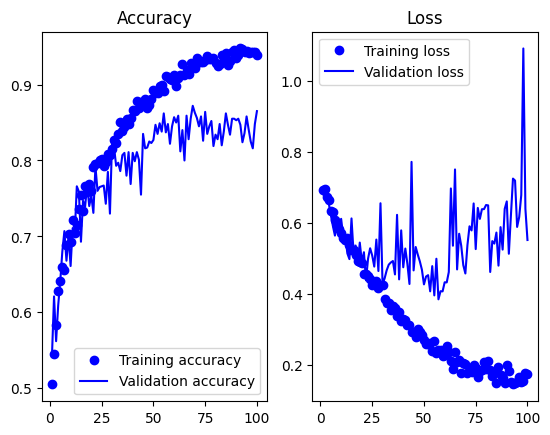

In [58]:
plt.rcParams['figure.dpi'] = 100  # figure size vergroten

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epochs, accuracy, "bo", label="Training accuracy")
ax1.plot(epochs, val_accuracy, "b", label="Validation accuracy")
ax1.set_title("Accuracy")
ax1.legend();

ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Loss")
ax2.legend();

In [59]:
# opgeslagen model laden want we willen het beste model!
# zie ModelCheckpoint callback: save_best_only=True
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 31ms/step - loss: 0.4788 - accuracy: 0.8430
Test accuracy: 0.843


Vergeet niet om "convnet_from_scratch_with_augmentation.h5" te downloaden als je in Google Colab werkt! (Anders ben je 't kwijt als je sessie wordt afgesloten...).

## 8.3. Leveraging a pretrained model

### 8.3.1. Feature extraction with a pretrained model

#### **Fast feature extraction without data augmentation**

De conv base van VGG16 downloaden:

In [60]:
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [61]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

Laat de conv base de data verwerken:

In [62]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


Shape van output is die van de laatste laag: (aantal_examples, 5, 5, 512)

In [63]:
print('Training:')
print("\tfeatures:", train_features.shape)
print("\tlabels:", train_labels.shape)
print('Validation:')
print("\tfeatures:", val_features.shape)
print("\tlabels:", val_labels.shape)
print('Test:')
print("\tfeatures:", test_features.shape)
print("\tlabels:", test_labels.shape)

Training:
	features: (2000, 5, 5, 512)
	labels: (2000,)
Validation:
	features: (1000, 5, 5, 512)
	labels: (1000,)
Test:
	features: (2000, 5, 5, 512)
	labels: (2000,)


Definieer de classifier:

In [64]:
inputs = keras.Input(shape=(5, 5, 512))  # krijgt output van convbase als input!
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

Train de classifier:

In [65]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction.h5",
    save_best_only=True,
    monitor="val_loss")]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 3s 16ms/step - loss: 16.5840 - accuracy: 0.9175 - val_loss: 5.2465 - val_accuracy: 0.9600
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 4.5407 - accuracy: 0.9710 - val_loss: 6.8563 - val_accuracy: 0.9620
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 2.0523 - accuracy: 0.9860 - val_loss: 3.7183 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5980 - accuracy: 0.9880 - val_loss: 5.0811 - val_accuracy: 0.9720
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1064 - accuracy: 0.9890 - val_loss: 4.6117 - val_accuracy: 0.9800
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.4419 - accuracy: 0.9965 - val_loss: 5.1144 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 1s 13ms/step - loss: 0.5485 - accuracy: 0.9950 - val_loss: 4.4734 - val_accuracy: 0.9780
Epoch 8/20
63/63

Plot loss en accuracy:

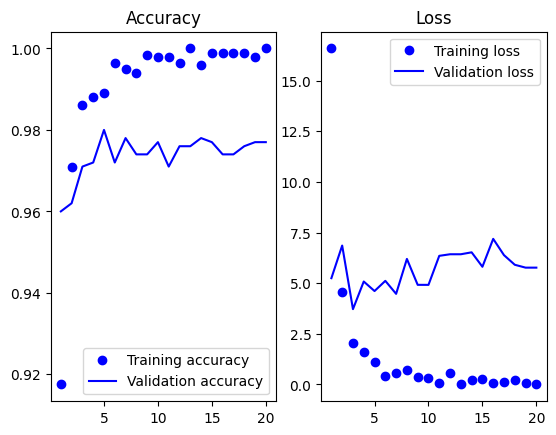

In [66]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # figure size vergroten

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epochs, acc, "bo", label="Training accuracy")
ax1.plot(epochs, val_acc, "b", label="Validation accuracy")
ax1.set_title("Accuracy")
ax1.legend();

ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Loss")
ax2.legend();

Conclusie: validatie nauwkeurigheid van ca 97% --> grote verbetering!

#### **Feature extraction together with data augmentation**

De conv base van VGG16 opnieuw downloaden, maar deze keer "de gewichten bevriezen":

In [67]:
from tensorflow import keras

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
)

In [68]:
conv_base.trainable = True
print("This is the number of trainable weight tensors "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weight tensors before freezing the conv base: 26


In [69]:
conv_base.trainable = False
print("This is the number of trainable weight tensors "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weight tensors after freezing the conv base: 0


Nu kunnen we een nieuw model creëren met:
- de data augmentation lagen
- de "bevroren" convolutional base
- de "dense" classifier

In [70]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

Model trainen (met GPU!):

In [71]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="feature_extraction_with_data_augmentation.h5",
    save_best_only=True,
    monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
63/63 [==============================] - 13s 173ms/step - loss: 19.9578 - accuracy: 0.9020 - val_loss: 3.7766 - val_accuracy: 0.9760
Epoch 2/50
63/63 [==============================] - 11s 164ms/step - loss: 8.2197 - accuracy: 0.9425 - val_loss: 4.0260 - val_accuracy: 0.9730
Epoch 3/50
63/63 [==============================] - 10s 160ms/step - loss: 4.7870 - accuracy: 0.9550 - val_loss: 7.7365 - val_accuracy: 0.9580
Epoch 4/50
63/63 [==============================] - 10s 159ms/step - loss: 3.8027 - accuracy: 0.9635 - val_loss: 3.0360 - val_accuracy: 0.9760
Epoch 5/50
63/63 [==============================] - 10s 159ms/step - loss: 4.5605 - accuracy: 0.9680 - val_loss: 8.6165 - val_accuracy: 0.9580
Epoch 6/50
63/63 [==============================] - 11s 165ms/step - loss: 3.7441 - accuracy: 0.9660 - val_loss: 5.5448 - val_accuracy: 0.9620
Epoch 7/50
63/63 [==============================] - 10s 161ms/step - loss: 4.6741 - accuracy: 0.9685 - val_loss: 3.4276 - val_accuracy: 0.979

Loss en accuracy plotten:

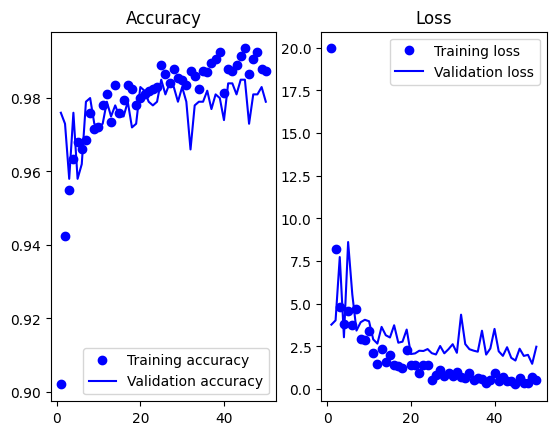

In [72]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epochs, acc, "bo", label="Training accuracy")
ax1.plot(epochs, val_acc, "b", label="Validation accuracy")
ax1.set_title("Accuracy")
ax1.legend();

ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Loss")
ax2.legend();

Model evalueren adhv de test set:

In [74]:
test_model = keras.models.load_model("feature_extraction_with_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 104ms/step - loss: 2.6003 - accuracy: 0.9795
Test accuracy: 0.979


Conclusie: niet zoveel verbetering, ondanks de data augmentation.

### 8.3.2. Fine-tuning a pretrained model

We gaan nu de laatste 4 lagen van de conv base finetunen:

In [76]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [77]:
# gewichten toekennen aan nieuwe variabele (zie verder)
weights_before = model.weights

Model hercompileren:

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),  # kleine learning rate nemen!
    metrics=["accuracy"]
)

In [ ]:
# de gewichten wijzigen dus niet na hercompileren van het model!!
model.weights == weights_before

True

Model hertrainen:

In [78]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.h5",
    save_best_only=True,
    monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 11s 173ms/step - loss: 0.6668 - accuracy: 0.9900 - val_loss: 2.4173 - val_accuracy: 0.9780
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 11s 174ms/step - loss: 0.9296 - accuracy: 0.9860 - val_loss: 1.5514 - val_accuracy: 0.9870
Epoch 3/30
63/63 [==============================] - 13s 199ms/step - loss: 0.3816 - accuracy: 0.9915 - val_loss: 1.7346 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 11s 167ms/step - loss: 0.4340 - accuracy: 0.9900 - val_loss: 2.0618 - val_accuracy: 0.9770
Epoch 5/30
63/63 [==============================] - 10s 161ms/step - loss: 0.3946 - accuracy: 0.9925 - val_loss: 1.2343 - val_accuracy: 0.9870
Epoch 6/30
63/63 [==============================] - 12s 182ms/step - loss: 0.5847 - accuracy: 0.9875 - val_loss: 1.5957 - val_accuracy: 0.9840
Epoch 7/30
63/63 [==============================] - 10s 158ms/step - loss: 0.5046 - accuracy: 0.9905 - val_loss: 1.7028 - val_accuracy: 0.9790
Epoch 8/30
63/63 [==============================] - 11s 166ms/step - loss: 0.4997 - accuracy: 0.9910 - val_loss: 1.4065 - val_accuracy: 0.9800
Epoch 9/30

Loss en accuracy plotten:

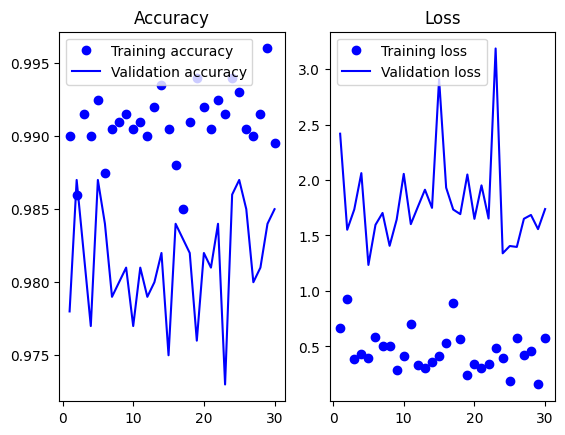

In [79]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(epochs, acc, "bo", label="Training accuracy")
ax1.plot(epochs, val_acc, "b", label="Validation accuracy")
ax1.set_title("Accuracy")
ax1.legend();

ax2.plot(epochs, loss, "bo", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.set_title("Loss")
ax2.legend();

Model evalueren adhv de test set:

In [81]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 101ms/step - loss: 1.8196 - accuracy: 0.9810
Test accuracy: 0.981


Conclusie: zeer hoge nauwkeurigheid ondanks de kleine dataset!

**Opdracht**: Pas de technieken die we in dit hoofdstuk hebben gezien toe op de dataset met schilderijen:
- Pas data augmentation toe en check verschillende opties
- Test verschillende conv bases van pretrained models in Keras uit, waarbij je al dan niet de bovenste lagen "hertraint"
- Test het effect van dropout lagen uit
- Check verschillende image input sizes (min, max, mean, median, P25, P75, ...)